In [1]:
# 로지스틱 회귀분석

%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data shape", digits.data.shape)
print('Label Data shape', digits.target.shape)

Image Data shape (1797, 64)
Label Data shape (1797,)


In [2]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

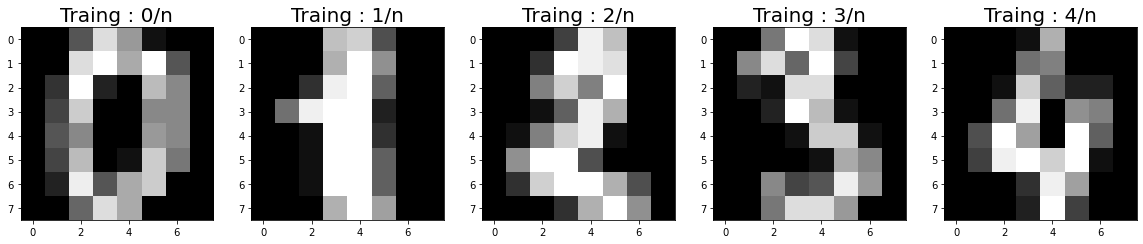

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Traing : %i/n' %label, fontsize = 20)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
logisticRegr.predict(X_test[0].reshape(1,-1))
logisticRegr.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [7]:
y_pred = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9511111111111111


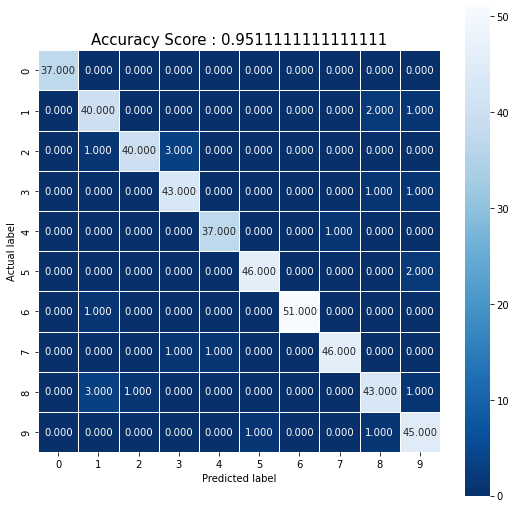

In [8]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths = .5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()